# EDA for the houses sold on Funda

In this jupiternotebook we conduct a analysis to get a better understanding of the funda dataset with a focus on the selling time


# Libraries and load


In [114]:
# Import libraries
import numpy as np # Linear algebra
import pandas as pd # Data processing, CSV file

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt # Plotting
import researchpy as rp # General statistics

#Import datetime to calculate the difference between two dates
from datetime import datetime

# to make jupyter print all outputs, not just the last one
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 

# topic modelling, terminal installation for first two lines

### python -m spacy download en_core_web_sm
### python -m spacy download nl_core_news_sm

import spacy
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import NMF
import re

In [115]:
# Reading the housing dataset 
funda = pd.read_csv("funda.csv")

# Able to show all columns
pd.set_option('display.max_columns', None)

# Dataset overview

In [116]:
# Show first and last 5 rows 
funda.head(5)
funda.tail(5)

,link,adress,postcodeCity,postcode,city,house_size,plot_size,bedrooms,price,Offered_since,Selling_date,Duration,house_description,price_sqm,status,housetype,built_type,year_of_construction,roof_type,NumberOfRooms,NumberOfBathrooms,NumberOfFloors,facilities,energylabel,isolation,heating,CV_ketel,garden,gardenLocation,storageSpace,storageFacilities,parkingType,makelaar,amountOfImages,Frontimage
0,https://www.funda.nl/koop/verkocht/peize/huis-...,Dalkruidlaan 18,9321 LN Peize,9321 LN,"Peize,Peize",125 m²,266 m²,4.0,€ 445.000 k.k.,3 december 2021,10 december 2021,7 dagen,Duurzaam wonen in een mooi vormgegeven 2-1 kap...,€ 3.560,Verkocht,"Eengezinswoning, 2-onder-1-kapwoning",Bestaande bouw,2013,Gedeeltelijk gestoffeerd,5 kamers (4 slaapkamers),1 badkamer en 1 apart toilet,3 woonlagen,"Balansventilatie, buitenzonwering, glasvezelka...",A,"Eengezinswoning, 2-onder-1-kapwoning","Gehele vloerverwarming, warmte terugwininstall...",NaN,Achtertuin en voortuin,Aan rustige weg en in woonwijk,Aangebouwde stenen garage,1 auto,Openbaar parkeren,Mijn Makelaar Noordenveld,32.0,https://cloud.funda.nl/valentina_media/152/570...
1,https://www.funda.nl/koop/verkocht/ooltgenspla...,Weesmolenstraat 6,3257 XM Ooltgensplaat,3257 XM,"Ooltgensplaat,Ooltgensplaat,woonkern",98 m²,320 m²,3.0,€ 450.000 k.k.,23 november 2021,10 december 2021,2 weken,"Mooie vrijstaande woning, met garage, nabij he...",€ 4.592,Verkocht,"Eengezinswoning, vrijstaande woning",Bestaande bouw,2006,Zadeldak bedekt met pannen,4 kamers (3 slaapkamers),1 badkamer en 1 apart toilet,2 woonlagen,"Buitenzonwering, mechanische ventilatie, TV ka...",A,"Eengezinswoning, vrijstaande woning",Cv-ketel en gedeeltelijke vloerverwarming,"Intergas (gas gestookt combiketel uit 2006, ei...","Achtertuin, voortuin en zijtuin",Aan rustige weg,Vrijstaande houten berging,NaN,Aangebouwde stenen garage,Van Rossum Makelaardij,35.0,https://cloud.funda.nl/valentina_media/152/147...
2,https://www.funda.nl/koop/verkocht/almere/huis...,Keiwierde 151,1353 NW Almere,1353 NW,"Almere,De,Wierden",98 m²,183 m²,2.0,€ 350.000 k.k.,22 november 2021,10 december 2021,2 weken,Deze verrassend ruime woning gelegen aan het w...,€ 3.571,Verkocht,"Eengezinswoning, tussenwoning",Bestaande bouw,1981-1990,Zadeldak,3 kamers (2 slaapkamers),1 badkamer en 1 apart toilet,2 woonlagen en een vliering,"Buitenzonwering, mechanische ventilatie en roo...",C,"Eengezinswoning, tussenwoning",Cv-ketel,"Atag (gas gestookt combiketel, eigendom)",Achtertuin en voortuin,"Aan rustige weg, aan water, in woonwijk en vri...",Vrijstaande stenen berging,Elektra,Parkeerplaats,AVENUE ´T GOOI MAKELAARS,27.0,https://cloud.funda.nl/valentina_media/152/141...
3,https://www.funda.nl/koop/verkocht/lochem/huis...,Zutphenseweg 10,7241 KR Lochem,7241 KR,"Lochem,Zuiderenk",177 m²,405 m²,4.0,€ 400.000 k.k.,24 november 2021,10 december 2021,2 weken,"Zutphenseweg 10, Lochem Wonen in een karakteri...",€ 2.260,Verkocht,"Eengezinswoning, 2-onder-1-kapwoning",Bestaande bouw,1906-1930,Samengesteld dak bedekt met pannen,5 kamers (4 slaapkamers),2 badkamers en 1 apart toilet,"2 woonlagen, een vliering en een kelder",Buitenzonwering en dakraam,C,"Eengezinswoning, 2-onder-1-kapwoning",Cv-ketel en gedeeltelijke vloerverwarming,"Daalderop (gas gestookt combiketel uit 2007, e...",Achtertuin en voortuin,Aan drukke weg en vrij uitzicht,Vrijstaande houten berging,NaN,Vrijstaande stenen garage,MakelaardijDesk Lochem,54.0,https://cloud.funda.nl/valentina_media/152/191...
4,https://www.funda.nl/koop/verkocht/maurik/huis...,Homoetsestraat 1 A,4021 HG Maurik,4021 HG,"Maurik,Maurik",174 m²,554 m²,5.0,€ 635.000 k.k.,24 november 2021,10 december 2021,2 weken,WAUW! Wat een ruimte en wat een prachtige en m...,€ 3.649,Verkocht,"Eengezinswoning, vrijstaande woning",Bestaande bouw,1999,Zadeldak bedekt met pannen,6 kamers (5 slaapkamers),1 badkamer en 2 aparte toiletten,3 woonlagen en een kelder,"Dakraam, mechanische ventilatie, rookkanaal en...",B,"Eengezinswoning, vrijstaande woning","Cv-ketel, gash

,link,adress,postcodeCity,postcode,city,house_size,plot_size,bedrooms,price,Offered_since,Selling_date,Duration,house_description,price_sqm,status,housetype,built_type,year_of_construction,roof_type,NumberOfRooms,NumberOfBathrooms,NumberOfFloors,facilities,energylabel,isolation,heating,CV_ketel,garden,gardenLocation,storageSpace,storageFacilities,parkingType,makelaar,amountOfImages,Frontimage
61730,https://www.funda.nl/koop/verkocht/voorburg/ap...,van Wassenaerstraat 48,2274 RD Voorburg,2274 RD,"Voorburg,Voorburg,Noord,noord",77 m²,1,NaN,€ 299.000 k.k.,20 mei 2021,5 juni 2021,2 weken,Op de bovenste woonlaag gelegen (geen bovenbur...,€ 3.883,Verkocht,Bovenwoning (appartement),Bestaande bouw,1927,Plat dak bedekt met bitumineuze dakbedekking,2 kamers (1 slaapkamer),1 badkamer en 1 apart toilet,2 woonlagen,1e woonlaag,F,Bovenwoning (appartement),Cv-ketel,"Remeha (gas gestookt combiketel uit 2015, eige...",Balkon aanwezig,Aan rustige weg en in woonwijk,Openbaar parkeren,NaN,Ja,C&D Makelaardij B.V.,32.0,https://cloud.funda.nl/valentina_media/143/590...
61731,https://www.funda.nl/koop/verkocht/woubrugge/h...,Comriekade 23,2481 AD Woubrugge,2481 AD,"Woubrugge,Woubrugge",95 m²,120 m²,3.0,€ 425.000 k.k.,14 juli 2021,5 augustus 2021,3 weken,Vrijstaande woning gelegen aan de ‘Woudweterin...,€ 4.474,Verkocht,"Eengezinswoning, vrijstaande woning",Bestaande bouw,1988,NaN,4 kamers (3 slaapkamers),2 woonlagen,NaN,NaN,B,"Eengezinswoning, vrijstaande woning",Cv-ketel,NaN,Achtertuin,Aan vaarwater,Vrijstaande houten berging,NaN,Openbaar parkeren,De Koning makelaars (ERA+NVM),31.0,https://cloud.funda.nl/valentina_media/145/775...
61732,https://www.funda.nl/koop/verkocht/blokker/hui...,Kolenbergstraat 2,1695 CD Blokker,1695 CD,"Blokker,Blokker,-,Buurt,31,04",104 m²,174 m²,3.0,€ 325.000 k.k.,16 april 2021,10 juni 2021,7 weken,"Let op: het betreft een ""bieden vanaf prijs"" v...",€ 3.125,Verkocht,"Eengezinswoning, hoekwoning",Bestaande bouw,1983,NaN,4 kamers (3 slaapkamers),1 badkamer en 2 aparte toiletten,2 woonlagen en een vliering,NaN,C,"Eengezinswoning, hoekwoning",Cv-ketel,"Nefit (gas gestookt combiketel uit 2010, eigen...",Achtertuin en voortuin,In woonwijk,Aangebouwde stenen garage,1 auto,Op eigen terrein,Boekweit | Olie Makelaars/taxateurs,31.0,https://cloud.funda.nl/valentina_media/142/312...
61733,https://www.funda.nl/koop/verkocht/lisse/huis-...,Trompstraat 22,2161 VC Lisse,2161 VC,"Lisse,Zeeheldenbuurt",84 m²,148 m²,5.0,€ 325.000 k.k.,1 juli 2021,15 juli 2021,14 dagen,Aan de Trompstraat staat deze tussenwoning in ...,€ 3.869,Verkocht,"Eengezinswoning, tussenwoning",Bestaande bouw,1959,Zadeldak bedekt met pannen,6 kamers (5 slaapkamers),1 badkamer en 1 apart toilet,3 woonlagen,TV kabel,E,"Eengezinswoning, tussenwoning",NaN,NaN,Achtertuin en voortuin,In centrum en in woonwijk,Vrijstaande stenen berging,Elektra,Openbaar parkeren,Chantal Lefeber Makelaars,43.0,https://cloud.funda.nl/valentina_media/145/237...
61734,https://www.funda.nl/koop/verkocht/voorthuizen...,Frans Halsstraat 69,3781 EV Voorthuizen,3781 EV,"Voorthuizen,De,Wheem",154 m²,348 m²,4.0,€ 469.000 k.k.,17 juni 2021,28 juni 2021,11 dagen,2-ONDER-1 KAPWONING AAN RUSTIG HOFJE Aan een d...,€ 3.045,Verkocht,"Eengezinswoning, 2-onder-1-kapwoning",Bestaande bouw,1972,NaN,5 kamers (4 slaapkamers),1 badkamer en 1 apart toilet,3 woonlagen,NaN,D,"Eengezinswoning, 2-onder-1-kapwoning",Cv-ketel en gedeeltelijke vloerverwarming,"Intergas (2018, eigendom)",Tuin rondom,In woonwijk,Aangebouwde stenen berging,NaN,Aangebouwde stenen garage,Drieklomp Makelaars en Rentmeesters,45.0,https://cloud.funda.nl/valentina_media/144/676...


In [117]:
# show the size of the dataset
print("There are {} rows and {} columns in the dataset".format(funda.shape[0], funda.shape[1]))

There are 61735 rows and 35 columns in the dataset


In [118]:
# Get all columns with the datatypes and amount non-null
funda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61735 entries, 0 to 61734
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   link                  61735 non-null  object 
 1   adress                61735 non-null  object 
 2   postcodeCity          61735 non-null  object 
 3   postcode              61734 non-null  object 
 4   city                  61735 non-null  object 
 5   house_size            60145 non-null  object 
 6   plot_size             59448 non-null  object 
 7   bedrooms              40597 non-null  float64
 8   price                 61735 non-null  object 
 9   Offered_since         61735 non-null  object 
 10  Selling_date          60145 non-null  object 
 11  Duration              61735 non-null  object 
 12  house_description     61735 non-null  object 
 13  price_sqm             61341 non-null  object 
 14  status                59604 non-null  object 
 15  housetype          

In [119]:
# Check for NULL values 
n_nulls = funda.loc[lambda x: x.isnull().any(axis=1)].shape
print(f"There are {n_nulls[0]} rows with null values in this dataset")
funda.isna().sum().sort_values(ascending=False)

There are 46529 rows with null values in this dataset


storageFacilities       29194
CV_ketel                21644
bedrooms                21138
facilities              17834
parkingType             11942
garden                  11446
roof_type               10383
NumberOfFloors           7592
gardenLocation           6457
storageSpace             5387
heating                  5222
Frontimage               3593
amountOfImages           2316
plot_size                2287
status                   2131
isolation                1590
NumberOfBathrooms        1590
NumberOfRooms            1590
year_of_construction     1590
housetype                1590
Selling_date             1590
house_size               1590
built_type               1453
price_sqm                 394
postcode                    1
adress                      0
energylabel                 0
house_description           0
Duration                    0
Offered_since               0
price                       0
city                        0
makelaar                    0
postcodeCi

# Clean dataset

In [120]:
# make a copy of the dataset
funda_df = funda.copy()

In [121]:
# add columns
funda_df['nr_rooms'] = funda_df['NumberOfRooms'].str.extract('(\d+)')
funda_df['nr_bedrooms'] = funda_df['NumberOfRooms'].str.extract('\d.*?(\d+)')
funda_df['area'] = funda_df['postcode'].str[0:2]

# drop columns
funda_df.drop(columns='postcodeCity', inplace=True)
funda_df.drop(columns='storageFacilities', inplace=True)
funda_df.drop(columns='bedrooms', inplace=True)
funda_df.drop(columns='NumberOfBathrooms', inplace=True)
funda_df.drop(columns='Duration', inplace=True)
funda_df.drop(columns='NumberOfRooms', inplace=True)
funda_df.drop(columns='CV_ketel', inplace=True)
funda_df.drop(columns='facilities', inplace=True)
funda_df.drop(columns='parkingType', inplace=True)
funda_df.drop(columns='roof_type', inplace=True)
funda_df.drop(columns='NumberOfFloors', inplace=True)
funda_df.drop(columns='gardenLocation', inplace=True)
funda_df.drop(columns='storageSpace', inplace=True)
funda_df.drop(columns='heating', inplace=True)
funda_df.drop(columns='isolation', inplace=True)
funda_df.drop(columns='status', inplace=True)
funda_df.drop(columns='Frontimage', inplace=True)
funda_df.drop(columns='amountOfImages', inplace=True)

# Rename values
funda_df.rename(columns={'Offered_since': 'offered_since', 'Selling_date': 'selling_date'}, inplace=True)

# Change format of values
funda_df['house_size'] = funda_df['house_size'].str.replace('m²', '',regex=True).str.replace('.', '',regex=True)
funda_df['plot_size'] = funda_df['plot_size'].str.replace('m²', '',regex=True).str.replace('.', '',regex=True)
funda_df['price'] = funda_df['price'].str.replace('€', '',regex=True).str.replace('k.k.', '',regex=True).str.replace('.', '',regex=True).str.replace('von', '',regex=True)
funda_df['offered_since'] = funda_df['offered_since'].str.replace(' ','-')
funda_df['selling_date'] = funda_df['selling_date'].str.replace(' ','-')
funda_df['price_sqm'] = funda_df['price_sqm'].str.replace('€', '',regex=True).str.replace('k.k.', '',regex=True).str.replace('.', '',regex=True)
funda_df['year_of_construction'] = funda_df['year_of_construction'].str[-4:]
funda_df['link'] = pd.Categorical((pd.factorize(funda_df.link)[0] + 1).astype(str))

# Drop rows with verkoop bij inschrijving & prijs op aanvraag
funda_df = funda_df[funda_df.price != 'Verkoop bij inschrijving']
funda_df = funda_df[funda_df.price != 'Prijs op aanvraag']
funda_df = funda_df[funda_df.built_type != 'Verkocht']
funda_df = funda_df[funda_df.built_type != '€ 217.500 kosten koper']

#Change data type to english in order to convert the format
funda_df['offered_since'] = funda_df['offered_since'].str.replace('januari', '01').str.replace('februari', '02').str.replace('maart', '03').str.replace('april', '04').str.replace('mei', '05').str.replace('juni', '06').str.replace('juli', '07').str.replace('augustus', '08').str.replace('september', '09').str.replace('oktober', '10').str.replace('november', '11').str.replace('december', '12')
funda_df['selling_date'] = funda_df['selling_date'].str.replace('januari', '01').str.replace('februari', '02').str.replace('maart', '03').str.replace('april', '04').str.replace('mei', '05').str.replace('juni', '06').str.replace('juli', '07').str.replace('augustus', '08').str.replace('september', '09').str.replace('oktober', '10').str.replace('november', '11').str.replace('december', '12')

# Add a zero to the dates beginning with days 1-9
funda_df['selling_date'] = funda_df['selling_date'].str.zfill(10)
funda_df['offered_since'] = funda_df['offered_since'].str.zfill(10)

# Change datatype to calculate difference between days
funda_df['selling_date'] = pd.to_datetime(funda_df['selling_date'], format='%d-%m-%Y')
funda_df['offered_since'] = pd.to_datetime(funda_df['offered_since'], format='%d-%m-%Y')

# Calculate difference between offering and selling date and show results in column 'duration'
funda_df['duration_days'] = funda_df.selling_date - funda_df.offered_since

# change datatype 
funda_df = funda_df.astype({'duration_days': str}, errors='raise')

# remove the word days  
funda_df['duration_days'] = funda_df['duration_days'].str.extract('(\d+)')

# split city after the comma
funda_df['city'] = funda_df['city'].str.split(',').str.get(0)

# change housetype into more general categories
funda_df['housetype'] = funda_df['housetype'].str.split(',').str.get(0)
funda_df['housetype'] = funda_df['housetype'].str.split('(').str.get(0)
funda_df['housetype'] = funda_df['housetype'].str.rstrip()
funda_df['housetype'] = funda_df['housetype'].str.replace('Beneden + bovenwoning', 'Appartement', regex=False).str.replace('Benedenwoning', 'Appartement').str.replace('Bovenwoning', 'Appartement').str.replace('Portiekflat', 'Appartement').str.replace('Galerijflat', 'Appartement').str.replace('Tussenverdieping', 'Appartement').str.replace('Dubbel benedenhuis', 'Appartement').str.replace('Portiekwoning', 'Appartement').str.replace('Penthouse', 'Appartement')
funda_df['housetype'] = funda_df['housetype'].str.replace('Landgoed', 'Landhuis').str.replace('Herenhuis', 'Landhuis').str.replace('Villa', 'Landhuis').str.replace('Woonboerderij', 'Landhuis')
funda_df['housetype'] = funda_df['housetype'].str.replace('Maisonnette', 'Eengezinswoning')
funda_df['housetype'] = funda_df['housetype'].str.replace('Grachtenpand', 'Overig').str.replace('Studentenkamer', 'Overig').str.replace('Woonboot', 'Overig')

# change energylabel to high medium low
funda_df['energylabel'] = funda_df['energylabel'].str.replace('+', '', regex=False)
funda_df['energylabel'] = funda_df['energylabel'].str.replace('A', 'Low').str.replace('B', 'Low').str.replace('C', 'Medium').str.replace('D', 'Medium').str.replace('E', 'High').str.replace('F', 'High').str.replace('G', 'High')

# check data
funda_df.head()

,link,adress,postcode,city,house_size,plot_size,price,offered_since,selling_date,house_description,price_sqm,housetype,built_type,year_of_construction,energylabel,garden,makelaar,nr_rooms,nr_bedrooms,area,duration_days
0,1,Dalkruidlaan 18,9321 LN,Peize,125,266,445000,2021-12-03,2021-12-10,Duurzaam wonen in een mooi vormgegeven 2-1 kap...,3560,Eengezinswoning,Bestaande bouw,2013,Low,Achtertuin en voortuin,Mijn Makelaar Noordenveld,5,4,93,7
1,2,Weesmolenstraat 6,3257 XM,Ooltgensplaat,98,320,450000,2021-11-23,2021-12-10,"Mooie vrijstaande woning, met garage, nabij he...",4592,Eengezinswoning,Bestaande bouw,2006,Low,"Achtertuin, voortuin en zijtuin",Van Rossum Makelaardij,4,3,32,17
2,3,Keiwierde 151,1353 NW,Almere,98,183,350000,2021-11-22,2021-12-10,Deze verrassend ruime woning gelegen aan het w...,3571,Eengezinswoning,Bestaande bouw,1990,Medium,Achtertuin en voortuin,AVENUE ´T GOOI MAKELAARS,3,2,13,18
3,4,Zutphenseweg 10,7241 KR,Lochem,177,405,400000,2021-11-24,2021-12-10,"Zutphenseweg 10, Lochem Wonen in een karakteri...",2260,Eengezinswoning,Bestaande bouw,1930,Medium,Achtertuin en voortuin,MakelaardijDesk Lochem,5,4,72,16
4,5,Homoetsestraat 1 A,4021 HG,Maurik,174,554,635000,2021-11-24,2021-12-10,WAUW! Wat een ruimte en wat een prachtige en m...,3649,Eengezinswoning,Bestaande bouw,1999,Low,Achtertuin en zijtuin,Betuwe Makelaardij,6,5,40,16


In [122]:
#Check the datatypes
funda_df.dtypes

link                          category
adress                          object
postcode                        object
city                            object
house_size                      object
plot_size                       object
price                           object
offered_since           datetime64[ns]
selling_date            datetime64[ns]
house_description               object
price_sqm                       object
housetype                       object
built_type                      object
year_of_construction            object
energylabel                     object
garden                          object
makelaar                        object
nr_rooms                        object
nr_bedrooms                     object
area                            object
duration_days                   object
dtype: object

In [123]:
# Check for NULL values 
n_nulls = funda_df.loc[lambda x: x.isnull().any(axis=1)].shape
print(f"There are {n_nulls[0]} rows with null values in this dataset")
funda_df.isna().sum().sort_values(ascending=False)

There are 11393 rows with null values in this dataset


garden                  11220
nr_bedrooms              2440
plot_size                2147
duration_days            1453
housetype                1453
house_size               1453
nr_rooms                 1453
selling_date             1453
year_of_construction     1453
built_type               1452
area                        1
price_sqm                   1
postcode                    1
adress                      0
house_description           0
energylabel                 0
offered_since               0
makelaar                    0
price                       0
city                        0
link                        0
dtype: int64

In [124]:
# Check for duplicates
funda_df.drop_duplicates(subset=['link']).shape[0] == funda.shape[0]

False

In [125]:
# Drop missing values in housetype
missing_valueHT = funda_df[funda_df['housetype'].isnull()].index
funda_df = funda_df.drop(missing_valueHT, axis=0)

# Drop missing value in postcode
missing_valuePC = funda_df[funda_df['postcode'].isnull()].index
funda_df = funda_df.drop(missing_valuePC, axis=0)

In [126]:
# Change some datatypes into int
columns = ['price','nr_rooms', 'house_size', 'duration_days', 'year_of_construction']
for col in columns:
    funda_df[col] = funda_df[col].astype('int')

In [127]:
# Removing NULL Values

# Where nr_bedrooms is NULL, Get nr_rooms -1
funda_df['nr_bedrooms'].fillna(funda_df['nr_rooms'] -1, inplace=True)

# Where price_sqm is NULL, Get price devided by house_size
funda_df['price_sqm'].fillna(funda_df['price'] / funda_df['house_size'], inplace=True)

# Where plot_size is NULL, Get house_size
funda_df['plot_size'].fillna(funda_df['house_size'] , inplace=True)

# Where garden is NULL, fill in geen tuin
funda_df['garden'].fillna(('Geen garden') , inplace=True)

In [128]:
# check null values again after changes
funda_df.isna().sum().sort_values(ascending=False)

link                    0
housetype               0
area                    0
nr_bedrooms             0
nr_rooms                0
makelaar                0
garden                  0
energylabel             0
year_of_construction    0
built_type              0
price_sqm               0
adress                  0
house_description       0
selling_date            0
offered_since           0
price                   0
plot_size               0
house_size              0
city                    0
postcode                0
duration_days           0
dtype: int64

In [129]:
## Log function to calculate more usefull values for price
funda_df['price_log'] = np.log(funda_df['price'])

In [130]:
# Change some datatypes into int
columns = ['plot_size','price_sqm','nr_bedrooms']
for col in columns:
    funda_df[col] = funda_df[col].astype('int')

# Change some datatypes into categorical
columns = ['housetype','energylabel', 'built_type']
for col in columns:
    funda_df[col] = funda_df[col].astype('category')

In [131]:
# change garden into more general categories
funda_df.garden = funda_df.garden.apply(lambda x: 'balkon' if 'balkon' in x else x)
funda_df.garden = funda_df.garden.apply(lambda x: 'balkon' if 'Balkon' in x else x)
funda_df.garden = funda_df.garden.apply(lambda x: 'balkon' if 'Dakterras' in x else x)

funda_df.garden = funda_df.garden.apply(lambda x: 'tuin' if 'achtertuin' in x else x)
funda_df.garden = funda_df.garden.apply(lambda x: 'tuin' if 'tuin' in x else x)
funda_df.garden = funda_df.garden.apply(lambda x: 'tuin' if 'Tuin' in x else x)
funda_df.garden = funda_df.garden.apply(lambda x: 'tuin' if 'patio' in x else x)
funda_df.garden = funda_df.garden.apply(lambda x: 'tuin' if 'Patio' in x else x)
funda_df.garden = funda_df.garden.apply(lambda x: 'tuin' if 'Zonneterras' in x else x)
funda_df.garden = funda_df.garden.apply(lambda x: 'tuin' if 'zonneterras' in x else x)

funda_df.garden = funda_df.garden.apply(lambda x: 'geen tuin' if 'Elektra' in x else x)
funda_df.garden = funda_df.garden.apply(lambda x: 'geen tuin' if 'elektra' in x else x)
funda_df.garden = funda_df.garden.apply(lambda x: 'geen tuin' if 'auto' in x else x)
funda_df.garden = funda_df.garden.apply(lambda x: 'geen tuin' if 'glas' in x else x)
funda_df.garden = funda_df.garden.apply(lambda x: 'geen tuin' if 'isolatie' in x else x)
funda_df.garden = funda_df.garden.apply(lambda x: 'geen tuin' if 'Ja' in x else x)
funda_df.garden = funda_df.garden.apply(lambda x: 'geen tuin' if 'Nee' in x else x)
funda_df.garden = funda_df.garden.apply(lambda x: 'geen tuin' if 'Plaats' in x else x)
funda_df.garden = funda_df.garden.apply(lambda x: 'geen tuin' if 'water' in x else x)
funda_df.garden = funda_df.garden.apply(lambda x: 'geen tuin' if 'Volledig' in x else x)
funda_df.garden = funda_df.garden.apply(lambda x: 'geen tuin' if 'Geen garden' in x else x)
funda_df.garden = funda_df.garden.apply(lambda x: 'geen tuin' if 'meter' in x else x)

In [132]:
rp.codebook(funda_df['garden'])

Variable: garden    Data Type: object 

 Number of Obs.: 59575 
 Number of missing obs.: 0 
 Percent missing: 0.0 
 Number of unique values: 3 

 Data Values and Counts: 
 
    Values  Frequency
   balkon       8645
geen tuin      13441
     tuin      37489






In [133]:
# Final check dataset
funda_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59575 entries, 0 to 61734
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   link                  59575 non-null  category      
 1   adress                59575 non-null  object        
 2   postcode              59575 non-null  object        
 3   city                  59575 non-null  object        
 4   house_size            59575 non-null  int32         
 5   plot_size             59575 non-null  int32         
 6   price                 59575 non-null  int32         
 7   offered_since         59575 non-null  datetime64[ns]
 8   selling_date          59575 non-null  datetime64[ns]
 9   house_description     59575 non-null  object        
 10  price_sqm             59575 non-null  int32         
 11  housetype             59575 non-null  category      
 12  built_type            59575 non-null  category      
 13  year_of_construc

In [134]:
rp.codebook(funda_df['energylabel'])

Variable: energylabel    Data Type: category 

 Number of Obs.: 59575 
 Number of missing obs.: 0 
 Percent missing: 0.0 
 Number of unique values: 3 

 Data Values and Counts: 
 
 Values  Frequency
  High      14665
   Low      23702
Medium      21208






# Visuals

In [135]:
# Get summary of the statistics
funda_df.describe()

,house_size,plot_size,price,price_sqm,year_of_construction,nr_rooms,nr_bedrooms,duration_days,price_log
count,59575.000000,59575.000000,5.957500e+04,59575.000000,59575.000000,59575.000000,59575.000000,59575.000000,59575.000000
mean,118.752446,369.967990,4.144251e+05,3551.964918,1972.961494,4.592614,3.144843,40.059874,12.819264
std,50.173636,2050.909438,2.555543e+05,1342.023127,37.432298,1.584351,1.179860,79.975151,0.453697
min,12.000000,1.000000,3.500000e+04,265.000000,1005.000000,1.000000,0.000000,0.000000,10.463103
25%,88.000000,3.000000,2.750000e+05,2679.000000,1956.000000,4.000000,2.000000,17.000000,12.524526
50%,112.000000,146.000000,3.500000e+05,3289.000000,1977.000000,5.000000,3.000000,22.000000,12.765688
75%,137.000000,266.000000,4.772500e+05,4110.000000,2000.000000,5.000000,4.000000,34.000000,13.075796
max,1580.000000,283320.000000,1.575000e+07,27193.000000,2024.000000,37.000000,9.000000,5106.000000,16.572351


<AxesSubplot:xlabel='duration_days', ylabel='Count'>

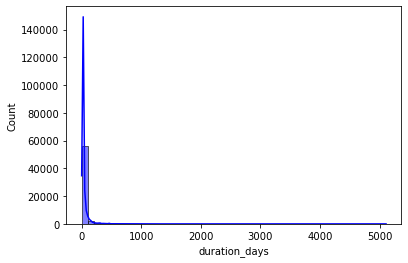

In [136]:
#Histogram for the logaritmic function of duration days
sns.histplot(funda_df['duration_days'], bins=50, color='blue', kde=True)
plt.show()

In [137]:
#This for-loop looks for the outliers in the data
all_columns         = list(funda_df)
numeric_columns     = ['price', 'house_size', 'plot_size', 'price_sqm', 'year_of_construction', 'nr_rooms', 'nr_bedrooms', 'duration_days', 'price_log']
categorical_columns = [x for x in all_columns if x not in numeric_columns ]

def outlier_detect(funda_df):
    for i in funda_df.describe().columns:
        Q1=funda_df.describe().at['25%',i]
        Q3=funda_df.describe().at['75%',i]
        IQR=Q3 - Q1
        LTV=Q1 - 1.5 * IQR
        UTV=Q3 + 1.5 * IQR
        x=np.array(funda_df[i])
        p=[]

        for j in x:
            if j < LTV or j>UTV:
               p.append(j)
        print('\n Outliers for Column:', i, ' Outliers count ', len(p))


x=funda_df[numeric_columns]

outlier_detect(x)


 Outliers for Column: price  Outliers count  3629

 Outliers for Column: house_size  Outliers count  2489

 Outliers for Column: plot_size  Outliers count  4592

 Outliers for Column: price_sqm  Outliers count  2651

 Outliers for Column: year_of_construction  Outliers count  830

 Outliers for Column: nr_rooms  Outliers count  8964

 Outliers for Column: nr_bedrooms  Outliers count  26

 Outliers for Column: duration_days  Outliers count  7705

 Outliers for Column: price_log  Outliers count  1399


C:\Users\royup\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='duration_days'>

Text(0.5, 1.0, 'Duration in days - Boxplot')

Text(0.5, 0, 'Duration in days')

C:\Users\royup\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Duration in days - Boxplot'}, xlabel='plot_size'>

Text(0.5, 1.0, 'Plot size - Boxplot')

Text(0.5, 0, 'Plot size')

C:\Users\royup\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='house_size'>

Text(0.5, 1.0, 'House size - Boxplot')

Text(0.5, 0, 'House size')

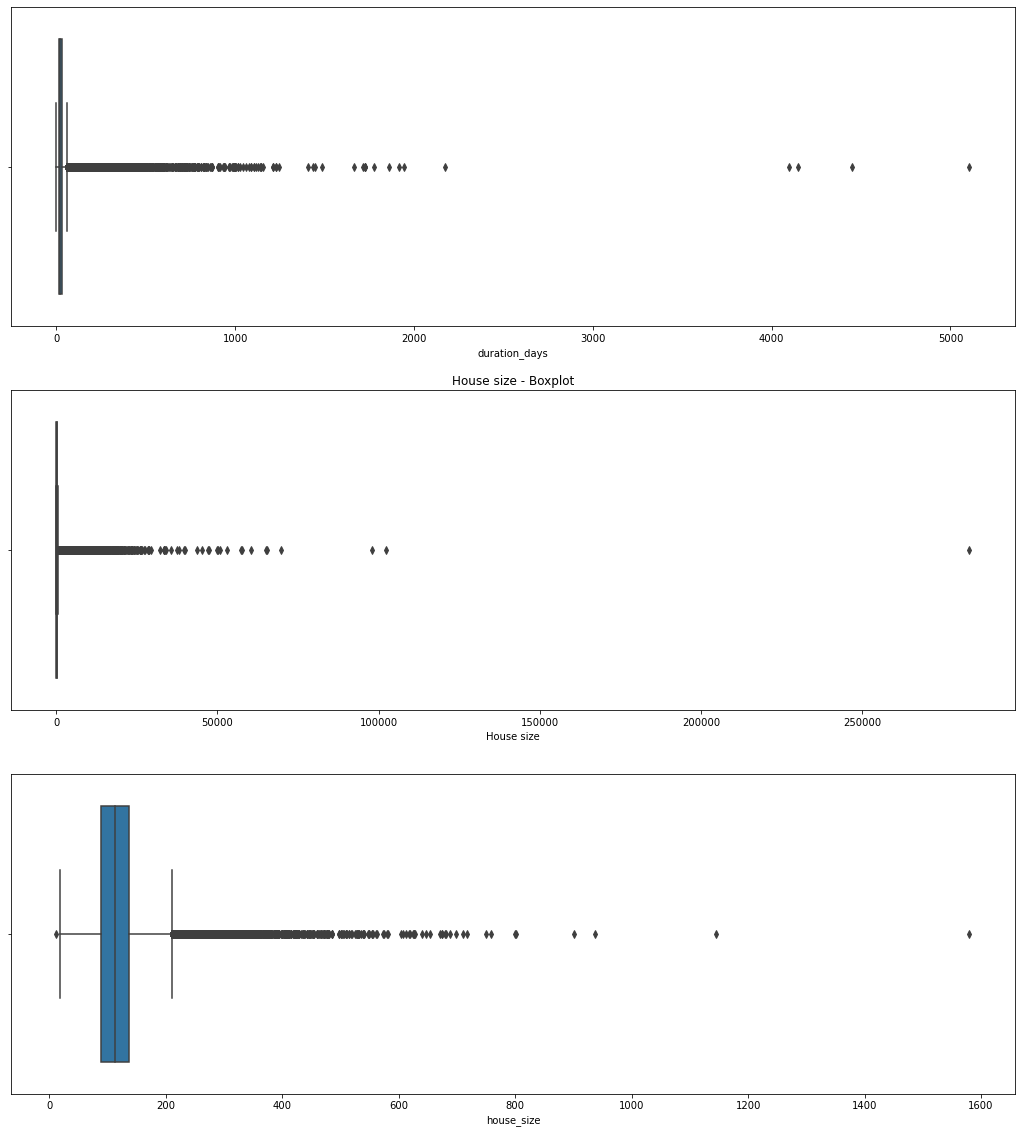

In [138]:
#Check the boxplots to get a better understanding of the spread
fig, axes = plt.subplots(figsize=(18, 20), nrows=3, ncols=1)

sns.boxplot(funda_df.duration_days, ax=axes[0])
axes[1].set_title("Duration in days - Boxplot")
axes[1].set_xlabel('Duration in days')

sns.boxplot(funda_df.plot_size, ax=axes[1])
axes[1].set_title("Plot size - Boxplot")
axes[1].set_xlabel('Plot size')

sns.boxplot(funda_df.house_size, ax=axes[2])
axes[1].set_title("House size - Boxplot")
axes[1].set_xlabel('House size')

plt.show()

In [139]:
#remove outliers for multiple values

#Price
#find IQR
percentile25_p = funda_df['price'].quantile(0.25)
percentile75_p = funda_df['price'].quantile(0.75)
iqr_p=percentile75_p-percentile25_p
#find limits
upper_limit_p = percentile75_p + 1.5 * iqr_p
lower_limit_p = percentile25_p - 1.5 * iqr_p
#trim outliers
funda_df = funda_df[funda_df['price'] < upper_limit_p]
funda_df = funda_df[funda_df['price'] > lower_limit_p]

#Duration in days
#find IQR
percentile25 = funda_df['duration_days'].quantile(0.25)
percentile75 = funda_df['duration_days'].quantile(0.75)
iqr=percentile75-percentile25
#find limits
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
#trim outliers
funda_df = funda_df[funda_df['duration_days'] < upper_limit]
funda_df = funda_df[funda_df['duration_days'] > lower_limit]

#plot size
#find IQR
percentile25_pl = funda_df['plot_size'].quantile(0.25)
percentile75_pl = funda_df['plot_size'].quantile(0.75)
iqr_pl=percentile75_pl-percentile25_pl
#find limits
upper_limit_pl = percentile75_pl + 1.5 * iqr_pl
lower_limit_pl = percentile25_pl - 1.5 * iqr_pl
#trim outliers
funda_df = funda_df[funda_df['plot_size'] < upper_limit_pl]
funda_df = funda_df[funda_df['plot_size'] > lower_limit_pl]

#house size
#find IQR
percentile25_h = funda_df['house_size'].quantile(0.25)
percentile75_h = funda_df['house_size'].quantile(0.75)
iqr_h=percentile75_h-percentile25_h
#find limits
upper_limit_h = percentile75_h + 1.5 * iqr_h
lower_limit_h = percentile25_h - 1.5 * iqr_h
#trim outliers
funda_df = funda_df[funda_df['house_size'] < upper_limit_h]
funda_df = funda_df[funda_df['house_size'] > lower_limit_h]

#price per square meter
#find IQR
percentile25_ps = funda_df['price_sqm'].quantile(0.25)
percentile75_ps = funda_df['price_sqm'].quantile(0.75)
iqr_ps=percentile75_ps-percentile25_ps
#find limits
upper_limit_ps = percentile75_ps + 1.5 * iqr_ps
lower_limit_ps = percentile25_ps - 1.5 * iqr_ps
#trim outliers
funda_df = funda_df[funda_df['price_sqm'] < upper_limit_ps]
funda_df = funda_df[funda_df['price_sqm'] > lower_limit_ps]

C:\Users\royup\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='duration_days'>

Text(0.5, 1.0, 'Duration in days - Boxplot')

Text(0.5, 0, 'Duration in days')

C:\Users\royup\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Duration in days - Boxplot'}, xlabel='plot_size'>

Text(0.5, 1.0, 'Plot size - Boxplot')

Text(0.5, 0, 'Plot size')

C:\Users\royup\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='house_size'>

Text(0.5, 1.0, 'House size - Boxplot')

Text(0.5, 0, 'House size')

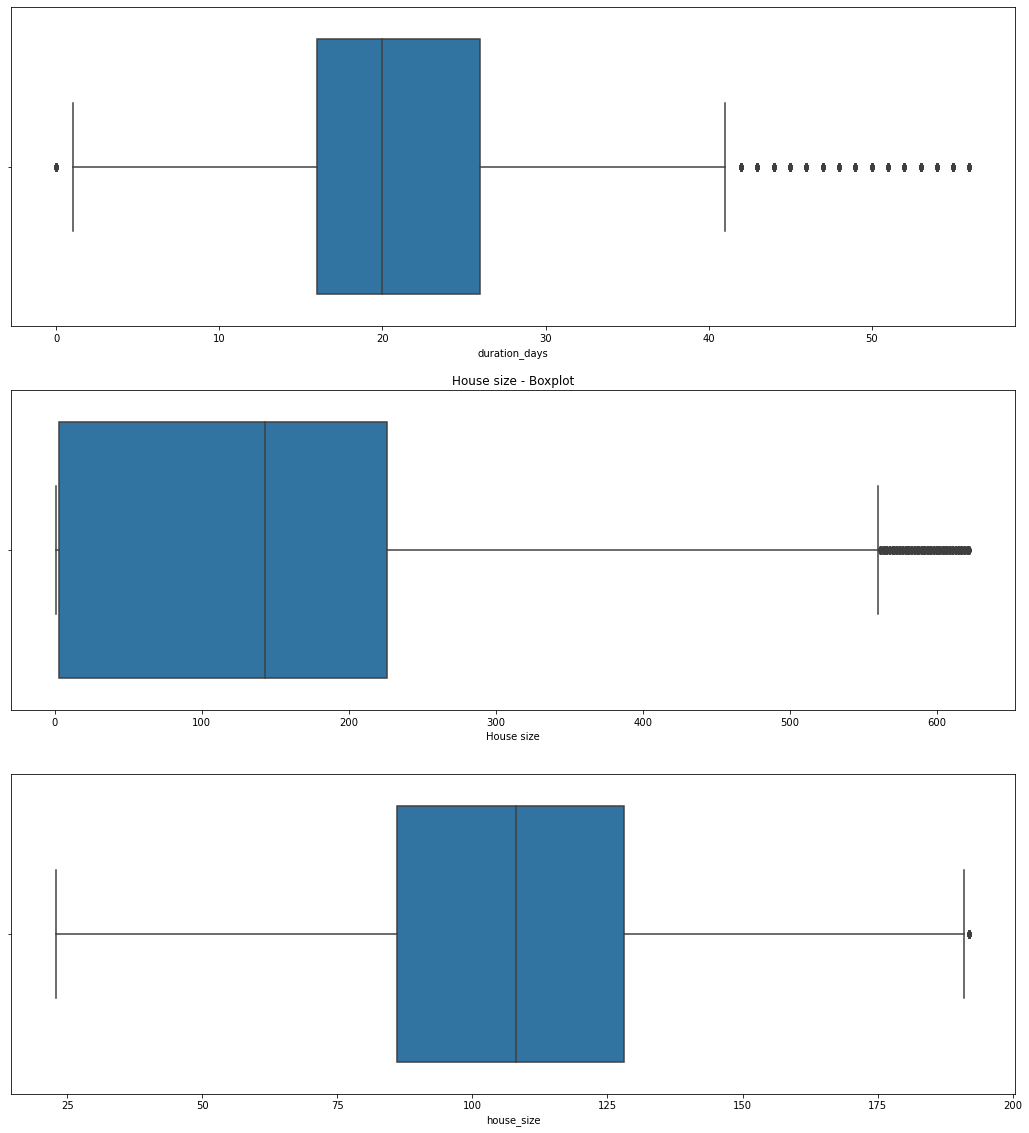

In [140]:
#Check the boxplot of the price to get a better understanding of the spread
fig, axes = plt.subplots(figsize=(18, 20), nrows=3, ncols=1)

sns.boxplot(funda_df.duration_days, ax=axes[0])
axes[1].set_title("Duration in days - Boxplot")
axes[1].set_xlabel('Duration in days')

sns.boxplot(funda_df.plot_size, ax=axes[1])
axes[1].set_title("Plot size - Boxplot")
axes[1].set_xlabel('Plot size')

sns.boxplot(funda_df.house_size, ax=axes[2])
axes[1].set_title("House size - Boxplot")
axes[1].set_xlabel('House size')

plt.show()

In [141]:
funda_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43414 entries, 0 to 61734
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   link                  43414 non-null  category      
 1   adress                43414 non-null  object        
 2   postcode              43414 non-null  object        
 3   city                  43414 non-null  object        
 4   house_size            43414 non-null  int32         
 5   plot_size             43414 non-null  int32         
 6   price                 43414 non-null  int32         
 7   offered_since         43414 non-null  datetime64[ns]
 8   selling_date          43414 non-null  datetime64[ns]
 9   house_description     43414 non-null  object        
 10  price_sqm             43414 non-null  int32         
 11  housetype             43414 non-null  category      
 12  built_type            43414 non-null  category      
 13  year_of_construc

C:\Users\royup\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration_days', ylabel='Density'>

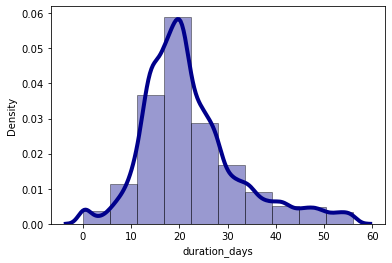

In [142]:
# Density Plot and Histogram of the duration days
sns.distplot(funda_df['duration_days'], hist=True, kde=True, 
             bins=int(10/1), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

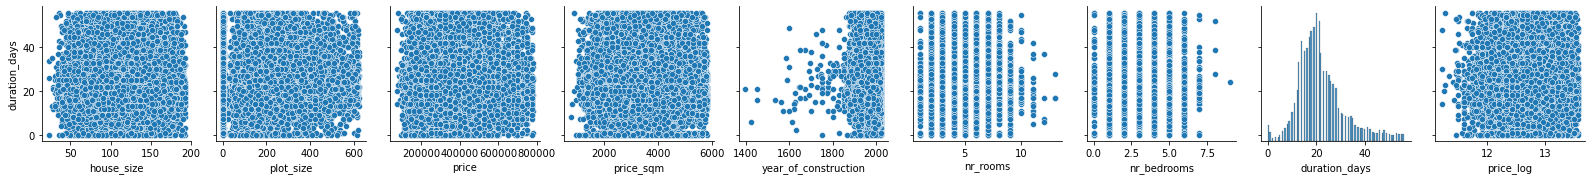

In [143]:
# Pairplot
sns.pairplot(funda_df, y_vars=('duration_days'))
plt.show()

The pairplot does not show any obvious relations between the time to sell a house and other numeric variables

<Figure size 720x432 with 0 Axes>

<AxesSubplot:xlabel='energylabel', ylabel='duration_days'>

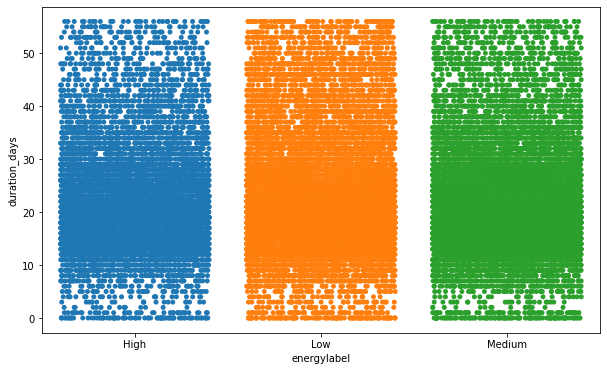

In [144]:
#Clear display of the duration in days between the energylabels 
plt.figure(figsize=(10,6))
sns.stripplot(data=funda_df,x='energylabel',y='duration_days',jitter=0.4)

Looking at the impact of the energy label on selling time there is no clear relation

<Figure size 720x432 with 0 Axes>

<AxesSubplot:xlabel='housetype', ylabel='duration_days'>

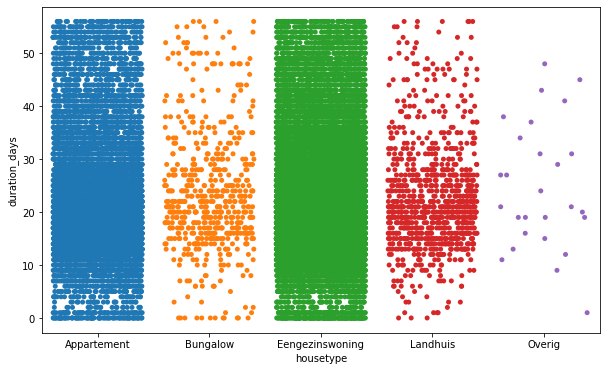

In [145]:
#Clear display of the duration in days between the energylabels 
plt.figure(figsize=(10,6))
sns.stripplot(data=funda_df,x='housetype',y='duration_days',jitter=0.4)

We can see that single family homes are sold at all durations, mansions are not often sold quickly, apartments and family homes look similar in their time to sell

<Figure size 720x432 with 0 Axes>

<AxesSubplot:xlabel='built_type', ylabel='duration_days'>

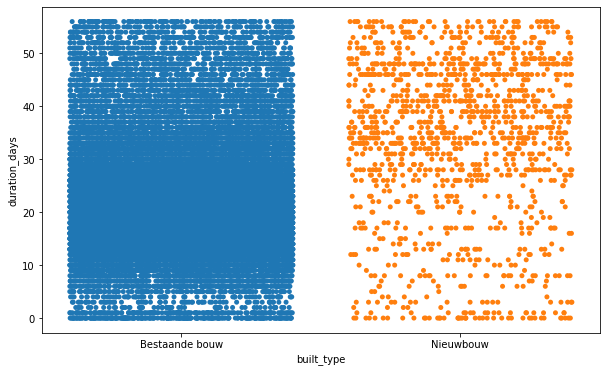

In [146]:
#Clear display of the duration in days between the energylabels 
plt.figure(figsize=(10,6))
sns.stripplot(data=funda_df,x='built_type',y='duration_days',jitter=0.4)

Newly constructed property is not sold often between 10 and 30 days while previously constructed homes are sold most often in this timespan.

<Figure size 1152x720 with 0 Axes>

<AxesSubplot:>

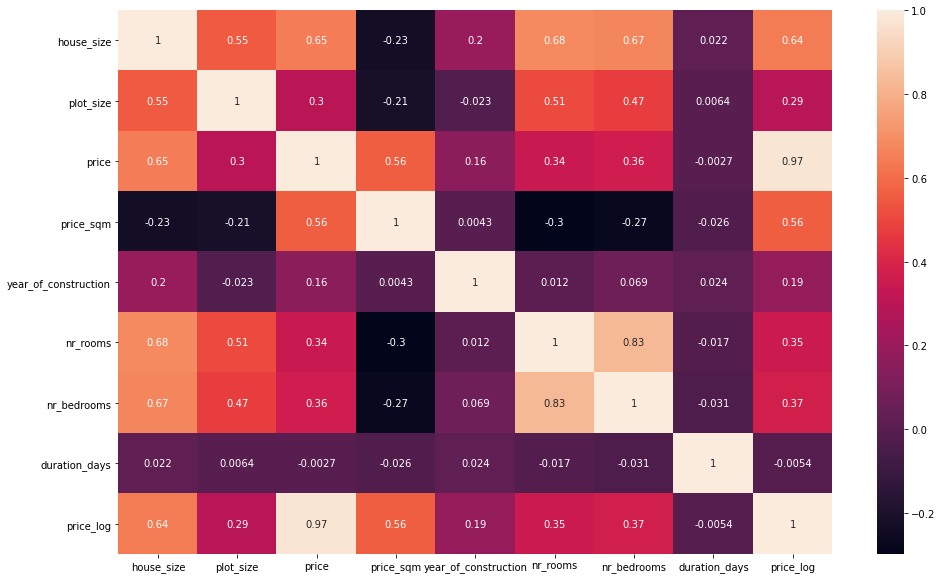

In [147]:
#Show the correlation matrix
plt.figure(figsize = (16,10))     
sns.heatmap(funda_df.corr(),annot = True)
plt.show()

Selling time does not seem to have a strong correlation with any of the other numeric values.

# Topic modelling

In [148]:
# taking the text as a vector
text_case = funda_df['house_description'].tolist()
text = [x.lower() for x in text_case]

In [149]:
# loading the dutch and english spacy language packages
nlp = spacy.load('nl_core_news_sm')
nep = spacy.load('en_core_web_sm')
type(nlp)
type(nep)

spacy.lang.nl.Dutch

spacy.lang.en.English

In [150]:
# tokenizing the house descriptions
docs = [nlp.make_doc(x) for x in text]

In [151]:
# after checking the dutch stopwords the english ones were printed to then add those to the stopwords list as the house descriptions are sometimes in english
stopwords = nlp.Defaults.stop_words
stopwords_english = nep.Defaults.stop_words
nlp.Defaults.stop_words |= {'well', 'whither', 'when', 'seem', 'again', 'n’t', 'm³.', 'voorzien', 'gelegen', 'v.v', 'circa', 't/m', 'around', 'is', 'm.', 'm3.', 'which', 'their', 'along', 'give', 'see', 'ligt', 'kom', 'komt', 'vindt', 'sluit', 'extra', 'betrekking', 'getekend', 'desbetreffende', 'inhoud', 'inclusief', 'belang', 'almost', 'for', "'d", 'quite', 'made', 'nowhere', 'many', 'could', 'formerly', 'me', 'she', 'so', 'her', 'namely', 'does', 'others', 'name', 'thereafter', 'there', 'regarding', 'latterly', 'former', 'bottom', 'ours', 'us', 'per', 'if', 'go', 'least', 'seeming', 'through', 'anything', 'they', 'most', 'him', 'sometimes', 'any', 'one', 'show', 'all', 'although', 'whole', 'whether', 'too', 'perhaps', 'meanwhile', 'over', 'elsewhere', 'in', 'hence', 'becoming', 'whence', 'thence', 'take', 'same', "'s", "'ve", 'ever', 'these', 'doing', 'from', 'empty', '‘ve', 'thus', 'throughout', 'thereupon', 'used', 'serious', 'alone', 'by', 'would', 'enough', 'my', 'nine', 'therein', 'becomes', 'eight', 'move', 'together', 'neither', 'may', 'call', 'fifteen', 'themselves', 'somewhere', 'wherever', 'i', 'wherein', 'sometime', 'why', 'here', "'ll", 'the', 'without', 'even', 'three', 'will', "'m", 'part', 'ten', 'else', 'whenever', 'both', 'though', 'up', '’s', 'can', 'has', 'keep', 'except', 'more', 'nevertheless', 'a', 'unless', 'were', 'last', 'across', 'either', 'of', 'often', 'few', 'say', 'top', 'are', 'seems', 'however', 'less', 'fifty', 'have', 'upon', 'everywhere', 'none', 'always', 'thru', 'mine', '‘s', '‘d', 'other', 'already', 'out', 'hereupon', 'no', 'should', 'did', 'you', 'had', 'might', 'but', 'become', 'something', 'or', 'two', 'beforehand', 'first', 'rather', 'five', 'further', 'herself', 'your', 'about', 'six', 'as', 'nobody', 'with', 'them', 'what', 'yet', '‘ll', 'onto', 'above', 'some', 'since', 'yourself', '’re', 'latter', 'towards', 'anywhere', 'therefore', 'down', 'forty', 'he', 'using', 'moreover', 'whom', 'being', "'re", 'please', 'not', 'indeed', 'who', 'until', 're', 'nothing', 'behind', 'within', 'then', 'we', 'whereas', 'into', 'to', 'than', 'below', 'nor', 'everyone', 'and', 'yourselves', 'because', 'now', 'afterwards', 'under', 'anyone', 'besides', 'put', 'hereby', '’ll', 'four', 'at', 'himself', 'amount', 'whoever', 'various', 'against', 'was', 'make', 'much', 'while', 'myself', 'an', 'ca', 'everything', 'done', 'how', 'on', '’d', 'anyway', 'still', 'off', 'front', '‘m', 'toward', 'such', 'hers', 'this', 'itself', 'side', 'before', 'whose', 'his', 'beyond', 'our', 'am', 'only', 'cannot', '’m', 'been', 'third', 'twelve', 'sixty', 'eleven', 'whereby', 'whatever', 'mostly', 'full', '‘re', 'became', 'during', 'be', 'beside', 'every', 'whereupon', 'back', 'someone', 'somehow', 'due', 'seemed', 'between', 'after', 'get', 'must', 'next', 'among', 'where', 'herein', 'ourselves', 'those', '’ve', 'just', 'own', 'anyhow', 'amongst', 'hundred', 'very', 'several', 'yours', 'whereafter', 'once', 'via', 'do', 'its', 'n‘t', "n't", 'twenty', 'that', 'another', 'it', 'thereby', 'otherwise', 'hereafter', 'noone', 'also', 'really', 'each', 'never', 'm', 'x', 'vaste', 'ii', 'i', 'ca.'}
print(nlp.Defaults.stop_words)

{'het', 'as', 'aldus', 'at', 'aangaangde', 'or', 'us', 'gewoonweg', 'pp', 'dikwijls', 'n’t', 'eveneens', 'aan', 'veel', 'anything', 'meer', 'due', 'moest', "n't", 'zou', 'jijzelf', 'voor', 'hereafter', 'on', 'ligt', 'three', 'until', 'hierboven', 'om', 'again', 'uw', 'many', 'doorgaand', 'am', 'hierin', 'from', 'move', 'wilde', '‘t', 'none', 'down', 'vaak', 'ook', 'dezelfde', 'thru', 'thans', 'indeed', 'keep', 'not', 'op', 'together', 'part', 'naar', 'ter', 'please', 'behalve', 'enkele', 'became', 'ze', 'often', 'towards', 'see', 'would', 'always', 'used', 'these', 'too', 'tenzij', 'zulke', 'do', 'well', 'show', 'hen', 'below', 'being', 'daarheen', 'could', 'that', 'of', 'wat', 'enz', 'reeds', 'and', 'about', 'onszelf', 'weinige', 'thereafter', 'sindsdien', 'kunnen', "'re", 'against', 'somewhere', 'iets', 'into', 'should', 'anders', 'eight', 'might', 'what', 'zullen', 'whither', 'have', 'doing', 'circa', 'zekere', 'm', 'maar', 'each', 'bovenstaand', 'though', 'mochten', 'done', 'enige'

In [152]:
# creating a regex for use in filtering out unwanted strings, this regex should filter out numbers, punctuation and string that does not contain words
digit_re = re.compile('^([0-9]|[\W]|[\\.,])*$')
if re.match(digit_re, "bkgjh7"):
    print("it's a match")
else:
    print("it's not a match")

it's not a match


In [153]:
# cleaning the previously created tokens, this is done by removing all tokens that are: stopwords, punctuation or numbers.
tokens_cleaned = []
for doc in docs:
    new_tokens = []
    for token in doc:
        if not token.is_stop and not token.is_punct and not token.is_space and not token.is_currency and not re.match(digit_re, token.text):
            new_tokens.append(token.text) 
    tokens_cleaned.append(new_tokens)

In [154]:
# fitting the cleaned tokens into the frequency matrix
def dummy(doc):
    return doc

count_vectorizer = CountVectorizer(
    tokenizer=dummy,
    preprocessor=dummy,
    )

frequency_matrix = count_vectorizer.fit_transform(tokens_cleaned)

In [155]:
# looking at the feature names
count_vectorizer.get_feature_names_out()

array(["'is", "'n", "'ns", ..., '•zonnig', '•zonnige', '•zó'],
      dtype=object)

In [156]:
# checking the dimensions of the matrix
frequency_matrix

<43414x114886 sparse matrix of type '<class 'numpy.int64'>'
	with 7028393 stored elements in Compressed Sparse Row format>

In [157]:
# limiting the amount of features being used in the model, the Tfid transformation coming next gives a higher weight to values that appear in a certain description while not 
# appearing often in the rest of the data. Because of this random values that appear once would add noise to the model by being valued quite highly.
count_vectorizer = CountVectorizer(
    tokenizer=dummy,
    preprocessor=dummy,
    max_features=10000
    )

frequency_matrix = count_vectorizer.fit_transform(tokens_cleaned)
frequency_matrix

<43414x10000 sparse matrix of type '<class 'numpy.int64'>'
	with 6649935 stored elements in Compressed Sparse Row format>

In [158]:
# the Tfid transformation
tfd_idf_trans = TfidfTransformer()
tf_idf_matrix = tfd_idf_trans.fit_transform(frequency_matrix)

In [159]:
# we apply a NMF model to the data, deciding on a n of 10.
model = NMF(n_components=7, init='nndsvd')
model.fit(X=tf_idf_matrix)

NMF(init='nndsvd', n_components=7)

In [160]:
# fitted NMF that shows the top words that define the topic
def get_topics(model, n_top_words):
    
    feature_names = count_vectorizer.get_feature_names_out()
    d = {}
    for i in range(model.n_components):
        words_ids = model.components_[i].argsort()[:-20 - 1:-1]
        words = [feature_names[key] for key in words_ids]
        d['Topic # ' + '{:02d}'.format(i+1)] = words
    return pd.DataFrame(d)

In [161]:
# showing the top 20 words that define the topic
get_topics(model, 20)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05,Topic # 06,Topic # 07
0,verdieping,appartement,meetinstructie,floor,m²,woning,garage
1,woning,balkon,koopovereenkomst,room,m³,ruimte,oprit
2,achtertuin,complex,particuliere,spacious,woning,tuin,bijkeuken
3,ruime,uitzicht,koper,house,bouwjaar,huis,woning
4,slaapkamer,lift,verkoper,located,woonoppervlakte,grote,tuin
5,achterzijde,berging,nen2580,apartment,verdieping,heerlijk,ruime
6,keuken,maand,informatie,kitchen,perceeloppervlakte,twee,verdieping
7,slaapkamers,vve,meten,living,slaapkamer,fijne,m2
8,voorzijde,toegang,mondelinge,storage,groot,keuken,toegang
9,overloop,parkeerplaats,verschillen,bathroom,perceel,plek,royale


In [162]:
# transforming the model to have weights
document_topics = model.transform(X=tf_idf_matrix)
document_topics.shape

(43414, 7)

In [163]:
# changing the model to a dataframe
funda_topics = pd.DataFrame(document_topics)

In [164]:
# resetting the index row so the row numbers match with the topic modelling dataframe
funda_df.reset_index(drop=True, inplace=True)

In [165]:
# combining the funda dataframe with the topic modelling scores
funda_df = pd.concat([funda_df, funda_topics], axis=1)

In [166]:
# checking to see if the merger was succesful
funda_df.head()

,link,adress,postcode,city,house_size,plot_size,price,offered_since,selling_date,house_description,price_sqm,housetype,built_type,year_of_construction,energylabel,garden,makelaar,nr_rooms,nr_bedrooms,area,duration_days,price_log,0,1,2,3,4,5,6
0,1,Dalkruidlaan 18,9321 LN,Peize,125,266,445000,2021-12-03,2021-12-10,Duurzaam wonen in een mooi vormgegeven 2-1 kap...,3560,Eengezinswoning,Bestaande bouw,2013,Low,tuin,Mijn Makelaar Noordenveld,5,4,93,7,13.005830,0.017452,0.000000,0.000000,0.000000,0.003408,0.006838,0.027625
1,2,Weesmolenstraat 6,3257 XM,Ooltgensplaat,98,320,450000,2021-11-23,2021-12-10,"Mooie vrijstaande woning, met garage, nabij he...",4592,Eengezinswoning,Bestaande bouw,2006,Low,tuin,Van Rossum Makelaardij,4,3,32,17,13.017003,0.007218,0.001430,0.000000,0.000000,0.000000,0.015851,0.076067
2,3,Keiwierde 151,1353 NW,Almere,98,183,350000,2021-11-22,2021-12-10,Deze verrassend ruime woning gelegen aan het w...,3571,Eengezinswoning,Bestaande bouw,1990,Medium,tuin,AVENUE ´T GOOI MAKELAARS,3,2,13,18,12.765688,0.019417,0.000000,0.083266,0.000524,0.000000,0.022626,0.000000
3,4,Zutphenseweg 10,7241 KR,Lochem,177,405,400000,2021-11-24,2021-12-10,"Zutphenseweg 10, Lochem Wonen in een karakteri...",2260,Eengezinswoning,Bestaande bouw,1930,Medium,tuin,MakelaardijDesk Lochem,5,4,72,16,12.899220,0.013943,0.005059,0.001267,0.000000,0.020889,0.007830,0.052219
4,5,Homoetsestraat 1 A,4021 HG,Maurik,174,554,635000,2021-11-24,2021-12-10,WAUW! Wat een ruimte en wat een prachtige en m...,3649,Eengezinswoning,Bestaande bouw,1999,Low,tuin,Betuwe Makelaardij,6,5,40,16,13.361380,0.005916,0.003539,0.000000,0.001411,0.000000,0.043602,0.052751


In [167]:
# renaming the new columns
funda_df.rename(columns={0: 'house properties', 1: 'facilities', 2: 'monetary specifications', 3: 'english description', 4: 'measureable properties', 5: 'ambiance description', 6: 'extra\'s'}, inplace=True)

In [168]:
# checking if renaming worked
funda_df.head()

,link,adress,postcode,city,house_size,plot_size,price,offered_since,selling_date,house_description,price_sqm,housetype,built_type,year_of_construction,energylabel,garden,makelaar,nr_rooms,nr_bedrooms,area,duration_days,price_log,house properties,facilities,monetary specifications,english description,measureable properties,ambiance description,extra's
0,1,Dalkruidlaan 18,9321 LN,Peize,125,266,445000,2021-12-03,2021-12-10,Duurzaam wonen in een mooi vormgegeven 2-1 kap...,3560,Eengezinswoning,Bestaande bouw,2013,Low,tuin,Mijn Makelaar Noordenveld,5,4,93,7,13.005830,0.017452,0.000000,0.000000,0.000000,0.003408,0.006838,0.027625
1,2,Weesmolenstraat 6,3257 XM,Ooltgensplaat,98,320,450000,2021-11-23,2021-12-10,"Mooie vrijstaande woning, met garage, nabij he...",4592,Eengezinswoning,Bestaande bouw,2006,Low,tuin,Van Rossum Makelaardij,4,3,32,17,13.017003,0.007218,0.001430,0.000000,0.000000,0.000000,0.015851,0.076067
2,3,Keiwierde 151,1353 NW,Almere,98,183,350000,2021-11-22,2021-12-10,Deze verrassend ruime woning gelegen aan het w...,3571,Eengezinswoning,Bestaande bouw,1990,Medium,tuin,AVENUE ´T GOOI MAKELAARS,3,2,13,18,12.765688,0.019417,0.000000,0.083266,0.000524,0.000000,0.022626,0.000000
3,4,Zutphenseweg 10,7241 KR,Lochem,177,405,400000,2021-11-24,2021-12-10,"Zutphenseweg 10, Lochem Wonen in een karakteri...",2260,Eengezinswoning,Bestaande bouw,1930,Medium,tuin,MakelaardijDesk Lochem,5,4,72,16,12.899220,0.013943,0.005059,0.001267,0.000000,0.020889,0.007830,0.052219
4,5,Homoetsestraat 1 A,4021 HG,Maurik,174,554,635000,2021-11-24,2021-12-10,WAUW! Wat een ruimte en wat een prachtige en m...,3649,Eengezinswoning,Bestaande bouw,1999,Low,tuin,Betuwe Makelaardij,6,5,40,16,13.361380,0.005916,0.003539,0.000000,0.001411,0.000000,0.043602,0.052751


# Creating the csv for use in modelling

In [169]:
# dropping unneccessary columns
funda_df.drop(columns=['adress', 'postcode', 'city', 'house_description', 'makelaar', 'offered_since', 'selling_date'], inplace=True)

In [170]:
# creating csv
funda_df.to_csv('sellingtime.csv',index=False)